# Tutorial

This notebook is based on the tutorial of the official web-site https://docs.atoti.io/latest/tutorial/tutorial.html.

It requires to install the atoti package by following the instructions below.

The visualization part of the tutorial is not addressed in this lab session. 

## Pre-requisite

### Install atoti

In [1]:
! pip install atoti

In [2]:
!pip list|grep atoti

atoti                         0.6.4
atoti-core                    0.6.4
atoti-query                   0.6.4


### Retrieve tutorial data

In [3]:
! wget https://nuage.lip6.fr/s/G9jCFZsMw9TAEbm/download/data.tar -O /home/data.tar

--2022-02-07 13:46:16--  https://nuage.lip6.fr/s/G9jCFZsMw9TAEbm/download/data.tar
Resolving nuage.lip6.fr (nuage.lip6.fr)... 132.227.201.11
Connecting to nuage.lip6.fr (nuage.lip6.fr)|132.227.201.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246784 (241K) [application/x-tar]
Saving to: ‘/home/data.tar’

/home/data.tar      100%[===================>] 241.00K   669KB/s    in 0.4s    

2022-02-07 13:46:17 (669 KB/s) - ‘/home/data.tar’ saved [246784/246784]



In [4]:
! tar xvf /home/data.tar

data/
data/products.csv
data/shops.csv
data/data_generator.ipynb
data/sales.csv


In [5]:
! head -n 5 data/sales.csv

Sale ID,Date,Shop,Product,Quantity,Unit price
S000000000,2021-02-04,shop_0,TAB_0,1.0,210.0
S000000001,2021-02-03,shop_1,TAB_1,1.0,300.0
S000000002,2021-02-02,shop_2,CHA_2,2.0,60.0
S000000003,2021-02-01,shop_3,BED_3,1.0,150.0


In [6]:
! head -n 5 data/products.csv

Product,Category,Sub category,Size,Purchase price,Color,Brand
TAB_0,Furniture,Table,1m80,190.0,black,Basic
TAB_1,Furniture,Table,2m40,280.0,white,Mega
CHA_2,Furniture,Chair,N/A,48.0,blue,Basic
BED_3,Furniture,Bed,Single,127.0,red,Mega


In [7]:
! head -n 5 data/shops.csv

Shop ID,City,State or region,Country,Shop size
shop_0,New York,New York,USA,big
shop_1,Los Angeles,California,USA,medium
shop_2,San Diego,California,USA,medium
shop_3,San Jose,California,USA,medium


###create/restore a session

In [8]:
import pandas as pd
import atoti as tt

session = tt.create_session()

/usr/local/lib/python3.7/dist-packages/atoti/_compatibility.py:17: FutureWarning: atoti's support for Python < 3.8 is deprecated and will be removed in the next release.
  "atoti's support for Python < 3.8 is deprecated and will be removed in the next release."


Welcome to atoti 0.6.4!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


### data loading

In [9]:
sales_table = session.read_csv("data/sales.csv", keys=["Date", "Shop", "Product"])
sales_table.head()

,,,Sale ID,Quantity,Unit price
Shop,Product,Date,,,
shop_0,TAB_0,2021-02-04,S000000000,1.0,210.0
shop_1,TAB_1,2021-02-03,S000000001,1.0,300.0
shop_2,CHA_2,2021-02-02,S000000002,2.0,60.0
shop_3,BED_3,2021-02-01,S000000003,1.0,150.0
shop_4,BED_4,2021-01-31,S000000004,3.0,300.0


In [10]:
products_table = session.read_csv("data/products.csv", keys=["Product"])
products_table.head()

,Category,Sub category,Size,Purchase price,Color,Brand
Product,,,,,,
TAB_0,Furniture,Table,1m80,190.0,black,Basic
TAB_1,Furniture,Table,2m40,280.0,white,Mega
CHA_2,Furniture,Chair,N/A,48.0,blue,Basic
BED_3,Furniture,Bed,Single,127.0,red,Mega
BED_4,Furniture,Bed,Double,252.0,brown,Basic


In [11]:
shops_table = session.read_csv("data/shops.csv", keys=["Shop ID"])
shops_table.head()

,City,State or region,Country,Shop size
Shop ID,,,,
shop_0,New York,New York,USA,big
shop_1,Los Angeles,California,USA,medium
shop_2,San Diego,California,USA,medium
shop_3,San Jose,California,USA,medium
shop_4,San Francisco,California,USA,small


## Cube creation
https://docs.atoti.io/latest/lib/atoti.session.html#atoti.session.Session.create_cube

In [12]:
session.closed

False

In [13]:
cube = session.create_cube(sales_table,
                           mode='auto')
cube

Cube(_name='Sales', _hierarchies=Hierarchies(), _measures=Measures())

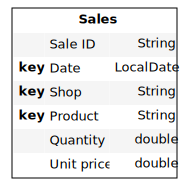

In [14]:
cube.schema

In [15]:
l, m, h = cube.levels, cube.measures, cube.hierarchies

In [16]:
h

Hierarchies()

In [17]:
l

Levels()

In [18]:
m

Measures()

#### creating dimension hierarchies




##### dates

In [19]:
cube.create_date_hierarchy("Date parts", column=sales_table["Date"])

In [20]:
del h['Date']

In [21]:
h

Hierarchies()

##### product categories
we need to join the fact table with the dimension tables

In [22]:
sales_table.join(products_table, mapping={"Product": "Product"})

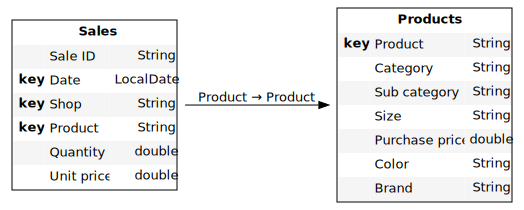

In [23]:
cube.schema

In [24]:
cube.hierarchies

Hierarchies()

In [25]:
h["Product"] = [l["Category"], l["Sub category"], l["Product"]]

In [26]:
del h["Category"]
del h["Sub category"]

In [27]:
cube.hierarchies

Hierarchies()

##### shop location


In [28]:
sales_table.join(shops_table, mapping={"Shop": "Shop ID"})

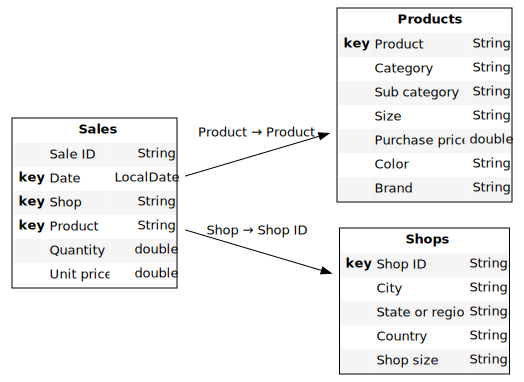

In [29]:
cube.schema

In [30]:
h

Hierarchies()

In [31]:
h["Geography"] = [
    shops_table["Country"],
    shops_table["State or region"],
    shops_table["City"],
]
del h["Country"]
del h["State or region"]
del h["City"]

In [32]:
h

Hierarchies()

### cleaning measures

In [33]:
m

Measures()

In [34]:
del m['Date_auto_d.MEAN']
del m['Date_auto_d.SUM']
del m['Date_auto_M.MEAN']
del m['Date_auto_M.SUM']
del m['Date_auto_y.MEAN']
del m['Date_auto_y.SUM']


In [35]:
m

Measures()

### introducing new measures

In [36]:
m["Max price"] = tt.agg.max(sales_table["Unit price"])

In [37]:
m

Measures()

## Querying
https://docs.atoti.io/latest/lib/atoti.cube.html#atoti.cube.Cube.query

### returning measures 

In [38]:
cube.query(m["contributors.COUNT"])

,contributors.COUNT
0,"5,000"


In [39]:
cube.query(m["Quantity.SUM"])

,Quantity.SUM
0,"8,077.00"


In [40]:
cube.query(m["Unit price.MEAN"])

,Unit price.MEAN
0,119.38


In [41]:
cube.query(m["Max price"])

,Max price
0,440.00


### slicing: projecting on specific dimensions

In [42]:
cube.query(m["contributors.COUNT"],
           levels=[l['Country']],
           include_totals=True
           )

,contributors.COUNT
Country,
Total,"5,000"
France,"1,875"
USA,"3,125"


In [43]:
cube.query(m["contributors.COUNT"],
           levels=[l['State or region']],
           include_totals=True
           )

contributors.COUNT
Country State or region                              
Total                                           5,000
France                                          1,875
        Auvergne-Rhône-Alpes                      750
        Provence-Alpes-Côte d'Azur                750
        Île-de-France                             375
USA                                             3,125
        California                              1,500
        Illinois                                  375
        New York                                  500
        Texas                                     750

In [44]:
cube.query(m["contributors.COUNT"],
           levels=[l['Country'], l['Month']],
           include_totals=True
           )

contributors.COUNT
Country Year Month                   
Total                           5,000
France                          1,875
        2021                    1,875
             1                  1,626
             2                    249
USA                             3,125
        2021                    3,125
             1                  2,706
             2                    419

In [45]:
cube.query(m["Max price"], 
           include_totals=True, 
           levels=[l["Category"]])

,Max price
Category,
Total,440.00
Cloth,60.00
Furniture,440.00


TODO: suggest releavant queries by chosing other combinations of dimensions and other measures

### dicing: selecting specific dimension members

In [46]:
cube.query(m['contributors.COUNT'],
           levels=[l['City']],
           condition=l["Country"] == "France",
           include_totals=True)

contributors.COUNT
Country State or region            City                            
Total                                                         1,875
France                                                        1,875
        Auvergne-Rhône-Alpes                                    750
                                   Lyon                         375
                                   Saint-Étienne                375
        Provence-Alpes-Côte d'Azur                              750
                                   Marseille                    375
                                   Nice                         375
        Île-de-France                                           375
                                   Paris                        375

In [47]:
cube.query(m['contributors.COUNT'],
           levels=[l['City'], l['Year']],
           condition=(
               (l["Year"] == "2021") & (l["Country"] == "France")
                )
           )

contributors.COUNT
Country State or region            City          Year                   
France  Auvergne-Rhône-Alpes       Lyon          2021                375
                                   Saint-Étienne 2021                375
        Provence-Alpes-Côte d'Azur Marseille     2021                375
                                   Nice          2021                375
        Île-de-France              Paris         2021                375

Is it possible to produce any specific aggregation for a specific month? 


How?

In [48]:
cube.query(m["contributors.COUNT"],
           levels=[l['Month']],
           include_totals=True
           )

contributors.COUNT
Year  Month                   
Total                    5,000
2021                     5,000
      1                  4,332
      2                    668

likewise, is it possible to produce any aggregation for a specific city? 


In [57]:
h["Geography"]

Hierarchy(_name='Geography', _levels={'Country': Level(_name='Country', _column_name='Country', _data_type=DataType(java_type='string', nullable=False), _hierarchy=..., _comparator=Comparator(_name='ASCENDING', _first_members=None)), 'State or region': Level(_name='State or region', _column_name='State or region', _data_type=DataType(java_type='string', nullable=False), _hierarchy=..., _comparator=Comparator(_name='ASCENDING', _first_members=None)), 'City': Level(_name='City', _column_name='City', _data_type=DataType(java_type='string', nullable=False), _hierarchy=..., _comparator=Comparator(_name='ASCENDING', _first_members=None))}, _dimension='Shops', _slicing=False, _cube_name='Sales', _visible=True, _update_hierarchies=<bound method Hierarchies.update of Hierarchies()>)

In [60]:
del h["Geography"]
h["Geography"] = [
    # shops_table["Country"],
    # shops_table["State or region"],
    shops_table["City"],
]

In [61]:
h["Geography"]

Hierarchy(_name='Geography', _levels={'City': Level(_name='City', _column_name='City', _data_type=DataType(java_type='string', nullable=False), _hierarchy=..., _comparator=Comparator(_name='ASCENDING', _first_members=None))}, _dimension='Shops', _slicing=False, _cube_name='Sales', _visible=True, _update_hierarchies=<bound method Hierarchies.update of Hierarchies()>)

In [62]:
cube.query(m["contributors.COUNT"],
           levels=[l['City']],
           condition= (l["City"] == "Paris"),
           include_totals=True
           )

,contributors.COUNT
City,
Total,375
Paris,375
